# Assignemt 01
## Exercise 1: Ridge Regression

In [250]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import glob

mse_lamda_train = {}
mse_lamda_test = {}


class RigeRegression:
    def __init__(self, X, y):
        I = np.eye(X.shape[1])
        I[0, 0] = 0
        self.X = X
        self.XT = self.X.T
        self.y = y
        self.I = I
        self.weights = None

    def fit(self, lmda):
        self.weights = np.dot(np.linalg.inv(np.dot(self.XT, self.X) + lmda * self.I), np.dot(self.XT, self.y))

    def predict(self, X):
        return np.dot(X, self.weights)

    def mse(self, y_predict, y):
        return np.mean((y_predict - y) ** 2)


def load_data(filename):
    print"Running Regression on {}".format(filename)
    data = np.loadtxt(filename, skiprows=1, delimiter=',')
    print "Input Data Shape:{}".format(data.shape)
    cols = np.arange(data.shape[1] - 1)
    X = data[:, cols]
    y = data[:, data.shape[1] - 1:data.shape[1]]
    return X, y


def split_data_file():
    data = np.loadtxt('data/train-1000-100.csv', skiprows=1, delimiter=',')
    data_50 = np.split(data, [50])
    data_50[0] = np.vstack((np.zeros((1, data_50[0].shape[1])), data_50[0]))
    data_100 = np.split(data, [100])
    data_100[0] = np.vstack((np.zeros((1, data_100[0].shape[1])), data_100[0]))
    data_150 = np.split(data, [150])
    data_150[0] = np.vstack((np.zeros((1, data_150[0].shape[1])), data_150[0]))
    np.savetxt("data/train-50(1000)-100.csv", data_50[0], delimiter=',')
    np.savetxt("data/train-100(1000)-100.csv", data_100[0], delimiter=',')
    np.savetxt("data/train-150(1000)-100.csv", data_150[0], delimiter=',')


def read_data_files(filename):
    data = np.loadtxt(filename, skiprows=1, delimiter=',')


def divide_files(files):
    file_map = {}
    for file in files:
        if 'train' in file:
            if '(1000)' in file:
                file_map[file] = 'data/test-1000-100.csv'
            else:
                file_map[file] = file.replace('train', 'test')
    return file_map


def part_a():
    print "Part A [START]"
    split_data_file()
    files = glob.glob("data/*.csv")
    file_map = divide_files(files)
    fig, ax = plt.subplots(4, 2)
    fig.canvas.set_window_title('HW01_PB01_A')
    fig.set_size_inches(15.0, 20.0)
    row, col = 0, 0
    for train in file_map:
        mse_train = []
        mse_test = []

        X_train, y_train = load_data(train)
        X_test, y_test = load_data(file_map[train])

        X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

        r_reg = RigeRegression(X_train, y_train)
        
        for l in range(1, 151):
            r_reg.fit(l)
            mse_train.append(r_reg.mse(r_reg.predict(X_train), y_train))
            mse_test.append(r_reg.mse(r_reg.predict(X_test), y_test))
        
        min_l_index_train = np.argmin(mse_train)
        mse_lamda_train[train] = (min_l_index_train + 1, mse_train[min_l_index_train])

        min_l_index_test = np.argmin(mse_test)
        mse_lamda_test[train] = (min_l_index_test + 1, mse_test[min_l_index_test])

        ax[row][col].scatter([min_l_index_train + 1], mse_train[min_l_index_train], color='green', label="min mse")
        ax[row][col].scatter([min_l_index_test + 1], mse_test[min_l_index_test], color='blue', label="min mse")
        ax[row][col].plot(np.arange(1, 151), mse_train, label="train",color='green')
        ax[row][col].plot(np.arange(1, 151), mse_test, label="test",color='blue')
        ax[row][col].set_xlabel("lambda")
        ax[row][col].set_ylabel("mse")
        ax[row][col].set_title(train + ";" + file_map[train])
        ax[row][col].legend()
        row += 1
        if row == 4:
            row = 0
            col = 1
    fig.delaxes(ax[3][1])
    print "Part A [END]"


def part_b():
    print "Part B [START]"
    lambdas = [1, 46, 150]
    X_train, y_train = load_data('data/train-1000-100.csv')
    X_test, y_test = load_data('data/test-1000-100.csv')
    mse_lambda_test = {}
    mse_lambda_train = {}
    for l in lambdas:
        mse_test_arr = []
        mse_train_arr = []
        for m in range(50, X_train.shape[0], 50):
            mse_test = 0
            mse_train = 0
            for i in range(50):
                random_selector = np.random.randint(0, high=X_train.shape[0], size=m)
                X_train_random = X_train[random_selector, :]
                X_train_random = np.hstack((np.ones((X_train_random.shape[0], 1)), X_train_random))
                y_train_random = y_train[random_selector, :]
                rReg = RigeRegression(X_train_random, y_train_random)
                rReg.fit(l)
                X_test_random = X_test[random_selector, :]
                X_test_random = np.hstack((np.ones((X_test_random.shape[0], 1)), X_test_random))
                y_test_random = y_test[random_selector, :]
                mse_test += rReg.mse(rReg.predict(X_test_random), y_test_random)
                mse_train += rReg.mse(rReg.predict(X_train_random), y_train_random)
            mse_test_arr.append(mse_test / 50)
            mse_train_arr.append(mse_train / 50)
        mse_lambda_test[l] = mse_test_arr
        mse_lambda_train[l] = mse_train_arr
    fig, ax = plt.subplots(3)
    fig.set_size_inches(10.0, 14.0)
    fig.canvas.set_window_title('HW01_PB01_B')
    row = 0
    for l in lambdas:
        ax[row].plot(np.arange(50, X_train.shape[0], 50), mse_lambda_train[l], label="train")
        ax[row].plot(np.arange(50, X_train.shape[0], 50), mse_lambda_test[l], label="test")
        ax[row].set_xlabel("m")
        ax[row].set_ylabel("mse")
        ax[row].set_title("lamda = {}".format(l))
        ax[row].legend()
        row+=1
    print "Part B [END]"


def k_fold_generator(X, y, k_fold):
    subset_size = (X.shape[0]) / k_fold
    for k in range(1, k_fold + 1):
        start_valid = (k - 1) * subset_size
        end_valid = start_valid + subset_size
        valid_rows = np.arange(start_valid, end_valid)
        train_rows = [x for x in range(X.shape[0]) if x not in valid_rows]
        X_train = X[train_rows, :]
        X_valid = X[valid_rows, :]
        y_train = y[train_rows, :]
        y_valid = y[valid_rows, :]
        # print X_train.shape,X_valid.shape,y_train.shape,y_valid.shape
        yield X_train, y_train, X_valid, y_valid


def get_cv(cv_array):
    arr = np.array(cv_array)
    return np.mean(arr, axis=0)


def part_c():
    print "Part C [START]"
    k_fold = 5
    split_data_file()
    files = glob.glob("data/*.csv")
    file_map = divide_files(files)
    cv = {}
    for train_file in file_map:
        X, y = load_data(train_file)
        cv_array = []
        for X_train, y_train, X_valid, y_valid in k_fold_generator(X, y, k_fold):
            mse_array = []
            X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
            X_valid = np.hstack((np.ones((X_valid.shape[0], 1)), X_valid))
            for l in range(1, 151):
                rReg = RigeRegression(X_train, y_train)
                rReg.fit(l)
                mse_array.append(rReg.mse(rReg.predict(X_valid), y_valid))
            cv_array.append(mse_array)
        cv_for_all_l = get_cv(cv_array)
        min_cv_index = np.argmin(cv_for_all_l)
        cv[train_file] = (min_cv_index + 1, cv_for_all_l[min_cv_index])
    print "Part C [END]"
    print '-----------------------RESULTS----------------------------------'
    for file in cv:
        print '------------------------[{}]-------------------------------------------\n' \
              'c_min_mse[{}]; c_best_lambda[{}];\na_min_mse[{}]; a_best_lambda[{}]\n' \
              '------------------------------------------------' \
              '------------------------------------------\n'.format(file, cv[file][1], cv[file][0],
                                                                    mse_lamda_test[file][1],
                                                                    mse_lamda_test[file][0])

***Note***: Please donb't run individual cell. Run all the cells to get proper results.

### Solution 1.a

Used the following closed form solution for Ridge Regression

$w = (X^T X + λ Ι)^{-1} X^T y$

As we increase the value of $\lambda$ MSE tends to rise. For closed form of regression mentioned above if we increase the number of featurs vs. exmaples, higher $\lambda$ has no effect in reducing the error. Thus the error increases with increased values of $\lambda$ as we can cleary se in graphs for 100-100 and 100-1000. 


Part A [START]
Running Regression on data/train-50(1000)-100.csv
Input Data Shape:(50, 101)
Running Regression on data/test-1000-100.csv
Input Data Shape:(1000, 101)
Running Regression on data/train-100(1000)-100.csv
Input Data Shape:(100, 101)
Running Regression on data/test-1000-100.csv
Input Data Shape:(1000, 101)
Running Regression on data/train-wine.csv
Input Data Shape:(342, 12)
Running Regression on data/test-wine.csv
Input Data Shape:(4556, 12)
Running Regression on data/train-150(1000)-100.csv
Input Data Shape:(150, 101)
Running Regression on data/test-1000-100.csv
Input Data Shape:(1000, 101)
Running Regression on data/train-100-100.csv
Input Data Shape:(100, 101)
Running Regression on data/test-100-100.csv
Input Data Shape:(1000, 101)
Running Regression on data/train-1000-100.csv
Input Data Shape:(1000, 101)
Running Regression on data/test-1000-100.csv
Input Data Shape:(1000, 101)
Running Regression on data/train-100-10.csv
Input Data Shape:(100, 11)
Running Regression on da

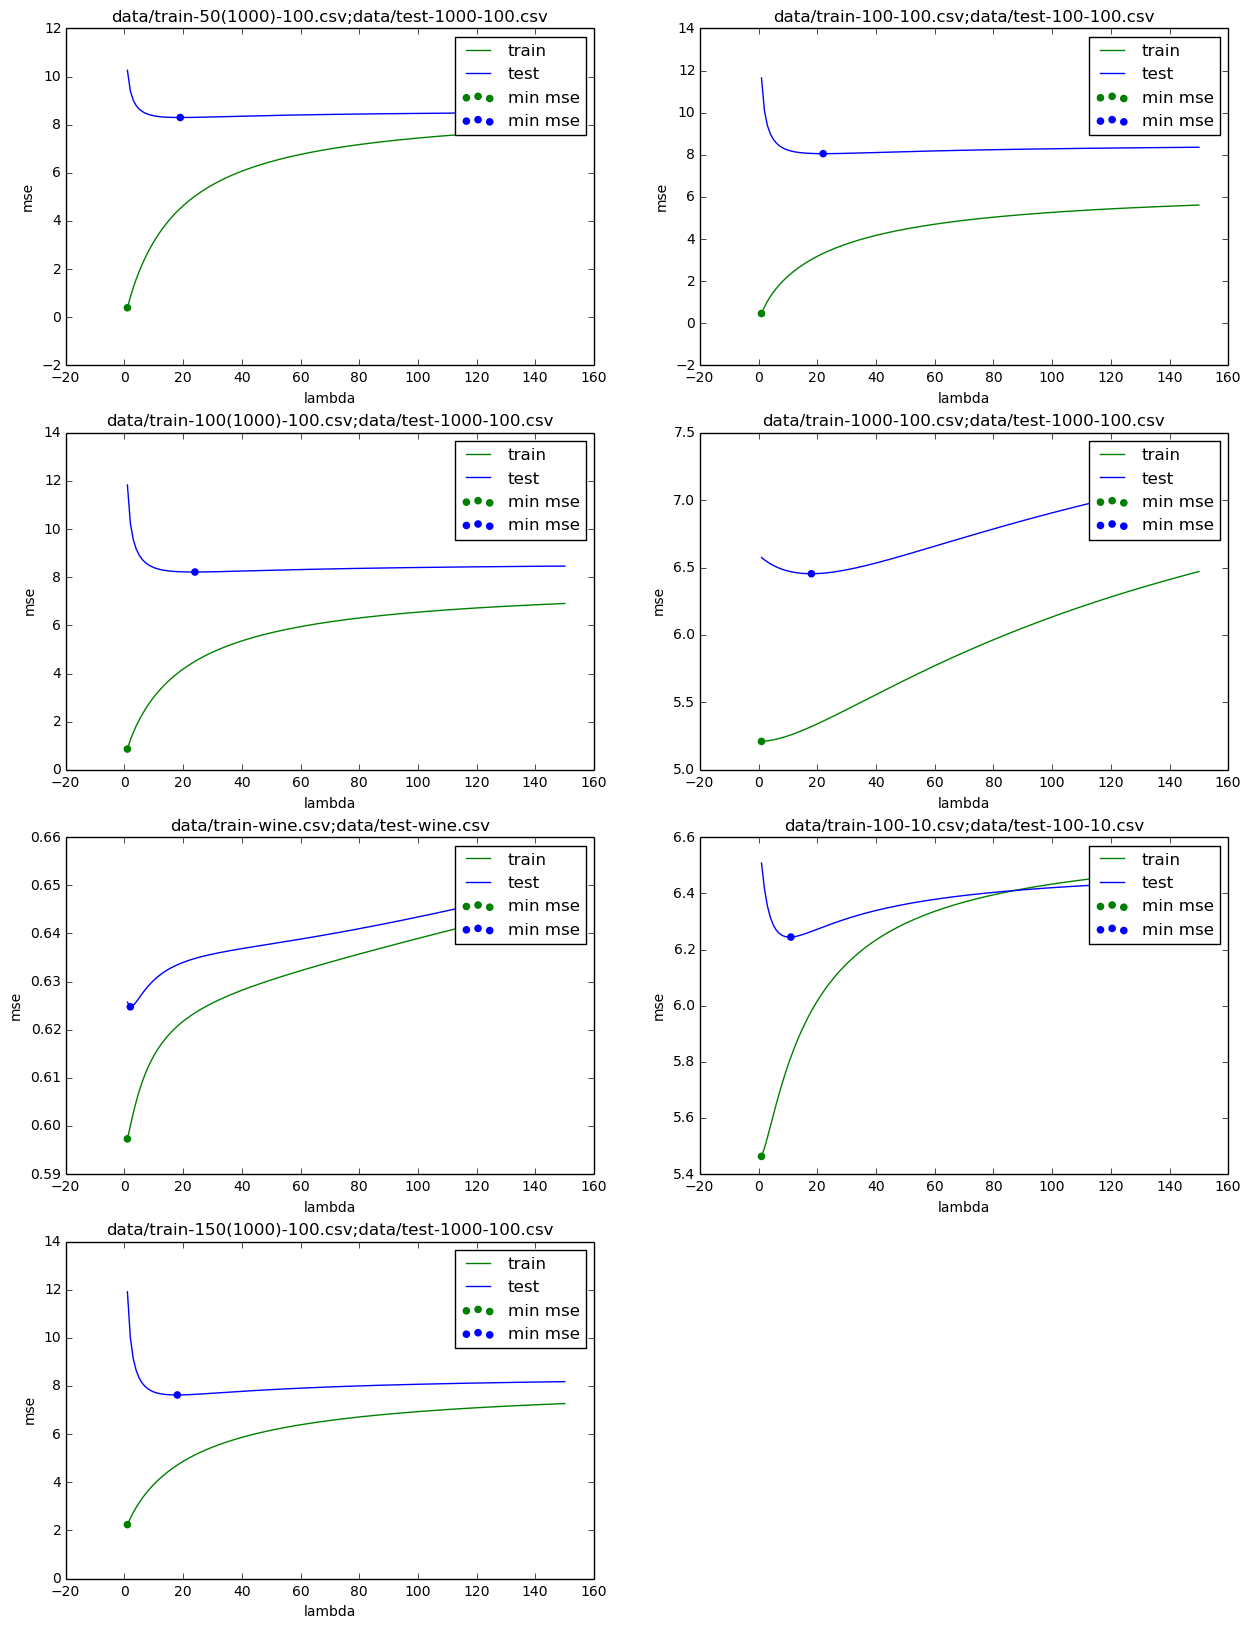

In [251]:
part_a()

### Solution 1.b

Part B [START]
Running Regression on data/train-1000-100.csv
Input Data Shape:(1000, 101)
Running Regression on data/test-1000-100.csv
Input Data Shape:(1000, 101)
Part B [END]


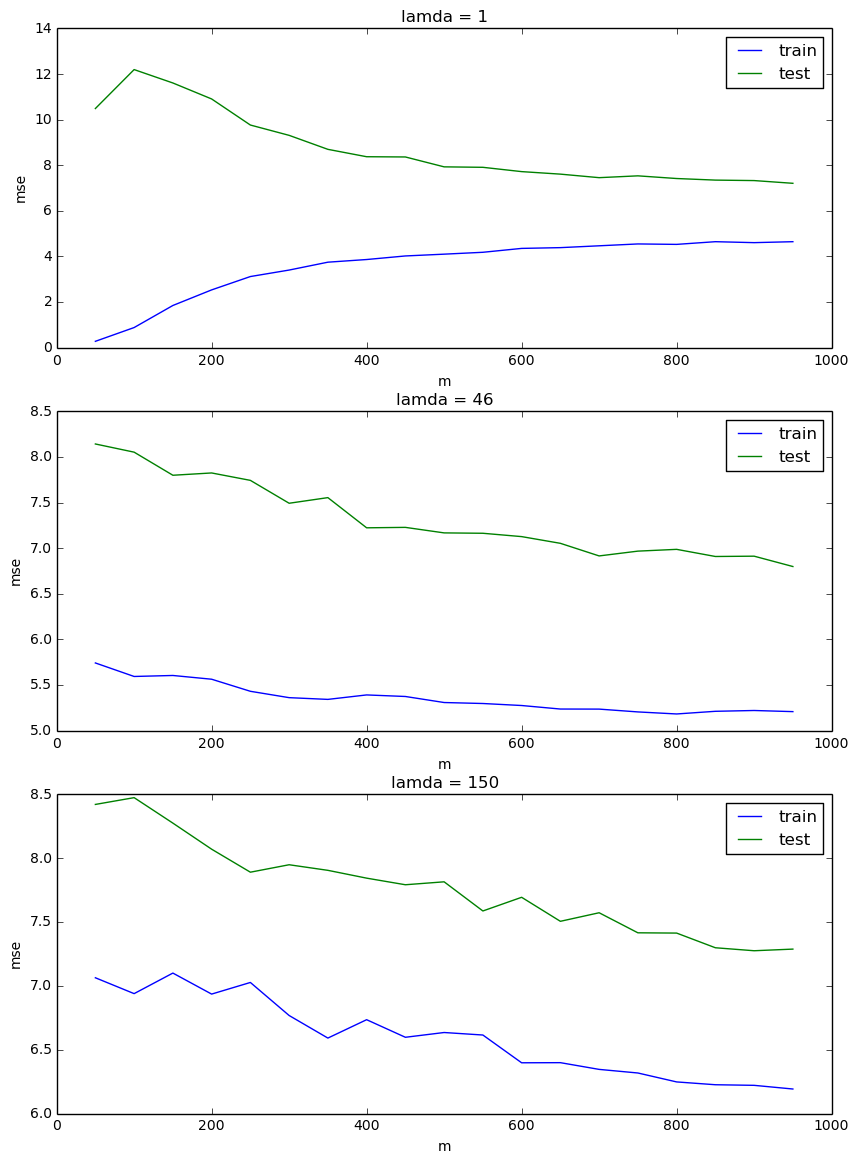

In [252]:
part_b()

### Solution 1.c
So the value of $\lambda$ and MSE obtained from CV almost matched to the Test results in part 1.a. More precise results can be achieved with more folds. 

#### Drawbacks of CV:
- Very costly if the training set is large as the traning algorithm needs to be run K times.
- Yields meaningful results only if the validation set and training set are drawn from the same population and only if human biases are controlled.

#### Factors affecting performace of CV:
- N, no. of records.
- D, no. of feature.
- k, no. of folds in cross validation.

In [253]:
part_c()

Part C [START]
Running Regression on data/train-50(1000)-100.csv
Input Data Shape:(50, 101)
Running Regression on data/train-100(1000)-100.csv
Input Data Shape:(100, 101)
Running Regression on data/train-wine.csv
Input Data Shape:(342, 12)
Running Regression on data/train-150(1000)-100.csv
Input Data Shape:(150, 101)
Running Regression on data/train-100-100.csv
Input Data Shape:(100, 101)
Running Regression on data/train-1000-100.csv
Input Data Shape:(1000, 101)
Running Regression on data/train-100-10.csv
Input Data Shape:(100, 11)
Part C [END]
-----------------------RESULTS----------------------------------
------------------------[data/train-1000-100.csv]-------------------------------------------
c_min_mse[6.34549085917]; c_best_lambda[20];
a_min_mse[6.45478038312]; a_best_lambda[18]
------------------------------------------------------------------------------------------

------------------------[data/train-100(1000)-100.csv]-------------------------------------------
c_min_mse[7.

### Solution 2

In [254]:
from IPython.display import IFrame
IFrame("SOLUTIONS_CS6220-03_HW01_PB02.pdf",width=1000, height=1200)